#                        **STORE DEMAND FORECAST**


<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/retail-marketing-blog.jpg" width="600" height="375" /></center>

## Table of Contents

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Loading Data](#section4)<br>
  - 4.1 [Description of the Datasets](#section401)<br>
  - 4.2 [Data Profiling and Pre-processing](#section402)<br>
5. [EDA](#section5)<br>
  - 5.1 [store-cities Dataset](#section501)<br>
  - 5.2 [sales Dataset](#section502)<br>
  - 5.3 [Merging of Data sets to Master Data](#section503)<br>
  - 5.4 [Top 10 performing stores in revenue](#section504)<br>
  - 5.5 [Top 10 performing stores by volume](#section505)<br>
  - 5.6 [Product wise sales trends](#section506)<br>
  - 5.7 [Product wise Revenue Performance](#section507)<br> 
  - 5.8 [ Pareto Analysis (80:20 rule)](#section508)<br>
  - 5.9 [SPF analysis](#section509)<br>
  - 5.10 [Sell-thru analysis](#section510)<br>
  - 5.11 [Product bundling analysis](#section511)<br>
  - 5.12 [Correlation Matrix](#section512)<br>
    
6. [Actionable Insights](#section6)

<a id=section1></a>
# 1. Introduction

The retail dataset provided captures the store-wise, date-wise itemized sales in terms of quantity for the period 2017 to 2019.

The dataset provides transactional data of 144 stores, date wise for the year 2017 till 2019, of 649 items, in terms of quantities sold, price and closing stock.

The dataset also provide cluster and hierarchy information of the products along with the discounts offered during the selling period. 

**Using the dataset we need to develop a forecasting model that can predict weekly itemized sales.**

<a id=section2></a>
# 2. Problem statement

Estimating and predicting sales is an important and key challenge in retail analytics.  Analysis in this area is plagued by issues related to sparseness of the sales data and multiple SKUs and categories.

**The objective of this project is to:**

- Predict weekly store sales for each product in a given store (80% weightage)
- Identify categories and stores that move together (20% weightage)

This will help the planning and merchandizing team for buying and placement of product in store to maximize sales and reduce lost sales opportunities.

This will also provide insight of the item sales trend over various period of a year and will help to capture events where spike and dip of sales can be seen. This will further help in fine tunning the forecasting process and demand planning. Better forecasting will ensure stores are properly stocked and we don't loose sales on account of stockout situation. 

Also, overstocking is a big issue if proper planning is not done. This blocks space and inventory having an adverse impact on store operating cost and profitability. Optimizing inventories is the key to success of retail stores.


<a id=section3></a>
# 3. Importing Packages

In [1]:
import numpy as np                     
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta

pd.options.display.float_format = '{:.2f}'.format 

pd.set_option("display.max_rows", None, "display.max_columns", None)

from sklearn import metrics

<a id=section4></a>
# 4. Loading Data

#### Mounting of Google Drive
This is done to access the data file saved in google drive on Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_prod_hierarchy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_hierarchy.csv')
df_prod_hierarchy.head()

product_id  product_length  product_depth  product_width cluster_id  \
0      P0000            5.00          20.00          12.00        NaN   
1      P0001           13.50          22.00          20.00  cluster_5   
2      P0002           22.00          40.00          22.00  cluster_0   
3      P0004            2.00          13.00           4.00  cluster_3   
4      P0005           16.00          30.00          16.00  cluster_9   

  hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
0           H00         H0004       H000401     H00040105   H0004010534  
1           H01         H0105       H010501     H01050100   H0105010006  
2           H03         H0315       H031508     H03150800   H0315080028  
3           H03         H0314       H031405     H03140500   H0314050003  
4           H03         H0312       H031211     H03121109   H0312110917

<a id=section401></a>
## 4.1 Description of the Dataset

#### Dataset Overview
- The dataset consists of sales data collected from a Turkish retail company. 
- The data is collected from the start of 2017 to the end of 2019.
- The dataset consists of 3 tables; sales.csv, product_hierarchy.csv, store_cities.csv.

#### File Description
- sales.csv – Sales data of the retail company. Daily sales data covering 2017-2019.
- product_hierarchy.csv - Data containing the hierarchy and sizes of the products.
- store_cities.csv - Data containing the city, type and size information of the stores.

#### Feature Description
- sales.csv
    - store_id - The unique identifier of a store.
    - product_id - The unique identifier of a product.
    - date - Sales date (YYYY-MM-DD)
    - sales - Sales quantity, the target variable.
    - revenue - Daily total sales revenue
    - stock - End of day stock quantity
    - price - Product sales price
    - promotype1 - Type of promotion applied on channel 1
    - promobin1 - Binned promotion rate for applied promotype1
    - promotype2 - Type of promotion applied on channel 2
    - promobin2 - Binned promotion rate for applied promotype2
    - promodiscount2 - Discount rate for applied promo type 2
    - promodiscounttype_2 - Type of discount applied

- product_hierarchy.csv
    - product_id – Schema key to sales.csv
    - product_length - Length of product
    - product_depth - Depth of product
    - product_width - Width of product
    - hierarchy1_id
    - hierarchy2_id
    - hierarchy3_id
    - hierarchy4_id
    - hierarchy5_id

- store_cities.csv
    - store_id- Schema key to sales.csv
    - storetype_id
    - store_size
    - city_id


<a id=section402></a>
## 4.2 Data Profiling and Pre-processing
 

In [4]:
df_prod_hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      699 non-null    object 
 1   product_length  681 non-null    float64
 2   product_depth   683 non-null    float64
 3   product_width   683 non-null    float64
 4   cluster_id      649 non-null    object 
 5   hierarchy1_id   699 non-null    object 
 6   hierarchy2_id   699 non-null    object 
 7   hierarchy3_id   699 non-null    object 
 8   hierarchy4_id   699 non-null    object 
 9   hierarchy5_id   699 non-null    object 
dtypes: float64(3), object(7)
memory usage: 54.7+ KB


**Observations on product hierarchy dataset:**

- No. of Variables: 10
- Numeric values: 3
- Categorical values: 7
- No. of entries: 699

1.   50 fields in cluster_id have null values which we will fill with a new cluster as 'cluster_11'.
2.   product_length, product_depth and product_width have null values. Since this are redundant fields for the purpose of forecasting, we will drop this fields.
3. We will also drop hierachy id columns except for hierarchy1_id. This is kept in view of identifying product bundling opportunities

In [5]:
df_prod_hierarchy["cluster_id"].fillna("cluster_11", inplace=True)
df_prod_hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      699 non-null    object 
 1   product_length  681 non-null    float64
 2   product_depth   683 non-null    float64
 3   product_width   683 non-null    float64
 4   cluster_id      699 non-null    object 
 5   hierarchy1_id   699 non-null    object 
 6   hierarchy2_id   699 non-null    object 
 7   hierarchy3_id   699 non-null    object 
 8   hierarchy4_id   699 non-null    object 
 9   hierarchy5_id   699 non-null    object 
dtypes: float64(3), object(7)
memory usage: 54.7+ KB


In [6]:
df_product_new = df_prod_hierarchy.drop(['product_length','product_depth','product_width','hierarchy2_id','hierarchy3_id','hierarchy4_id','hierarchy5_id'], axis=1)
df_product_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     699 non-null    object
 1   cluster_id     699 non-null    object
 2   hierarchy1_id  699 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB


In [7]:
df_store_cities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store_cities.csv')
df_store_cities.head()

store_id storetype_id  store_size city_id
0    S0091         ST04          19    C013
1    S0012         ST04          28    C005
2    S0045         ST04          17    C008
3    S0032         ST03          14    C019
4    S0027         ST04          24    C022

In [8]:
df_store_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      144 non-null    object
 1   storetype_id  144 non-null    object
 2   store_size    144 non-null    int64 
 3   city_id       144 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


**Observations in store_cities dataset:**

- No. of entries: 144
- Numeric variables: 1
- Categorical variable: 3
- Null values: Nil

1.   No null values in the dataframe
2.   dtypes respectively are found to be correct
3.   No action required.

In [9]:
df_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df_sales.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


product_id store_id        date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  2017-01-02   0.00     0.00   8.00   6.25         PR14   
1      P0001    S0012  2017-01-02   1.00     5.30   0.00   6.25         PR14   
2      P0001    S0013  2017-01-02   2.00    10.59   0.00   6.25         PR14   
3      P0001    S0023  2017-01-02   0.00     0.00   6.00   6.25         PR14   
4      P0001    S0025  2017-01-02   0.00     0.00   1.00   6.25         PR14   

  promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2 promo_discount_type_2  
0         NaN         PR03         NaN               nan                   NaN  
1         NaN         PR03         NaN               nan                   NaN  
2         NaN         PR03         NaN               nan                   NaN  
3         NaN         PR03         NaN               nan                   NaN  
4         NaN         PR03         NaN               nan                   NaN

In [10]:
df_sales.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   product_id             19454838 non-null  object 
 1   store_id               19454838 non-null  object 
 2   date                   19454838 non-null  object 
 3   sales                  18264076 non-null  float64
 4   revenue                18264076 non-null  float64
 5   stock                  18264076 non-null  float64
 6   price                  18882857 non-null  float64
 7   promo_type_1           19454838 non-null  object 
 8   promo_bin_1            2651689 non-null   object 
 9   promo_type_2           19454838 non-null  object 
 10  promo_bin_2            59081 non-null     object 
 11  promo_discount_2       59081 non-null     float64
 12  promo_discount_type_2  59081 non-null     object 
dtypes: float64(5), object(8)
memory usage: 1.9+ GB


**Observations in Sales dataset:**

- No. of entries:19454838
- No. of Variables: 13
- Numeric values:5
- Categorical values:8

1. Null values found in sales, revenue, stock, price and promo_discount_2 which we will be filling through cross referencing.
2. We will drop promo_bin_1, promo_bin_2, promo_type_1, promo_type_2 and promo_discount_type_2 categorical fields as these are irrelevant for the purpose of forecasting model


<a id=section5></a>
# 5. EDA

<a id=section501></a>
## 5.1. store-cities Dataset

In [11]:
df_city = df_store_cities.groupby(['storetype_id'])['city_id'].unique()
df_city

storetype_id
ST01                             [C031, C014, C036, C004]
ST02                                   [C014, C036, C031]
ST03    [C019, C014, C024, C035, C031, C022, C037, C01...
ST04    [C013, C005, C008, C022, C009, C014, C036, C03...
Name: city_id, dtype: object

In [12]:
df_size = df_store_cities.groupby(['storetype_id'])['store_size'].unique()
df_size

storetype_id
ST01                                     [83, 60, 86, 63]
ST02                                     [44, 28, 18, 41]
ST03           [14, 8, 16, 15, 17, 6, 12, 11, 13, 18, 20]
ST04    [19, 28, 17, 24, 20, 47, 21, 46, 18, 25, 45, 3...
Name: store_size, dtype: object

In [13]:
df_city_size = df_store_cities.groupby(['storetype_id','city_id'])['store_size'].unique()
df_city_size

storetype_id  city_id
ST01          C004                                                   [63]
              C014                                                   [60]
              C031                                                   [83]
              C036                                                   [86]
ST02          C014                                                   [44]
              C031                                                   [18]
              C036                                               [28, 41]
ST03          C003                                               [14, 12]
              C005                                                   [12]
              C006                                                   [13]
              C013                                                    [8]
              C014                       [14, 15, 16, 11, 18, 17, 12, 13]
              C019                                                   [14]
              C0

**Observations:**

1.   We can infer that STO1 are bigger format stores followed by ST02, ST03 and ST04 respectively. Though there could be few exceptions.
2.   It can be inferred that ST01 are in metro cities followed by ST02, ST03 and ST04 in T-1, T-2 and T-3 cities respectively.



<a id=section502></a>
## 5.2. sales Dataset

In [14]:
def missing_values(df):
    missing_data_df = []
    missing_data_df = pd.DataFrame(df.isnull().sum())
    missing_data_df.columns = ['missing_values']
    missing_data_df['missing%'] = (missing_data_df['missing_values']/df.shape[0])*100
    return missing_data_df

In [15]:
sales_missing_data_df = missing_values(df_sales)
sales_missing_data_df

missing_values  missing%
product_id                          0      0.00
store_id                            0      0.00
date                                0      0.00
sales                         1190762      6.12
revenue                       1190762      6.12
stock                         1190762      6.12
price                          571981      2.94
promo_type_1                        0      0.00
promo_bin_1                  16803149     86.37
promo_type_2                        0      0.00
promo_bin_2                  19395757     99.70
promo_discount_2             19395757     99.70
promo_discount_type_2        19395757     99.70

**Observations:**

1.   Date dtype is object that needs to be converted to datetime
2.   Missing values in sales, revenue, stock, price and promo_discount_type2 which we identified can be imputed through cross referencing
3. Fields like promo_bin_1, promo_bin_2 and promo_discount_2 were having maximum null values and were found to be unwanted columns. We have decided to drop the same.



### Imputing Price with calculated value of each product
- price = revenue/sales

In [16]:
#df_sales['price'] = df_sales['price'].fillna(df_sales.groupby('product_id')['price'].transform('median'))
df_sales['sales'] = df_sales['sales'].fillna(0)
df_sales['revenue'] = df_sales['revenue'].fillna(0)
df_sales['price'] = df_sales['price'].fillna(df_sales['revenue']/df_sales['sales'])
df_sales['stock'] = df_sales['stock'].fillna(0)
df_sales['price'] = df_sales['price'].fillna(0)
df_sales.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   product_id             19454838 non-null  object 
 1   store_id               19454838 non-null  object 
 2   date                   19454838 non-null  object 
 3   sales                  19454838 non-null  float64
 4   revenue                19454838 non-null  float64
 5   stock                  19454838 non-null  float64
 6   price                  19454838 non-null  float64
 7   promo_type_1           19454838 non-null  object 
 8   promo_bin_1            2651689 non-null   object 
 9   promo_type_2           19454838 non-null  object 
 10  promo_bin_2            59081 non-null     object 
 11  promo_discount_2       59081 non-null     float64
 12  promo_discount_type_2  59081 non-null     object 
dtypes: float64(5), object(8)
memory usage: 1.9+ GB


### Imputing promo_discount_2 values

In [17]:
if 'sales'==0 in df_sales.columns:
	df_sales['promo_discount_2'] == 0

else :
	df_sales['promo_discount_2'] = (((df_sales['price']*df_sales['sales'])-df_sales['revenue'])/(df_sales['price']*df_sales['sales']))*100

df_sales['promo_discount_2'] = df_sales['promo_discount_2'].fillna(0)
df_sales.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   product_id             19454838 non-null  object 
 1   store_id               19454838 non-null  object 
 2   date                   19454838 non-null  object 
 3   sales                  19454838 non-null  float64
 4   revenue                19454838 non-null  float64
 5   stock                  19454838 non-null  float64
 6   price                  19454838 non-null  float64
 7   promo_type_1           19454838 non-null  object 
 8   promo_bin_1            2651689 non-null   object 
 9   promo_type_2           19454838 non-null  object 
 10  promo_bin_2            59081 non-null     object 
 11  promo_discount_2       19454838 non-null  float64
 12  promo_discount_type_2  59081 non-null     object 
dtypes: float64(5), object(8)
memory usage: 1.9+ GB


### Dropping unwanted Columns

In [18]:
df_sales_new = df_sales.drop(['promo_type_1','promo_type_2','promo_bin_1','promo_bin_2','promo_discount_type_2'], axis=1)
df_sales_new['date'] = pd.to_datetime(df_sales_new.date)
df_sales_new.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 8 columns):
 #   Column            Non-Null Count     Dtype         
---  ------            --------------     -----         
 0   product_id        19454838 non-null  object        
 1   store_id          19454838 non-null  object        
 2   date              19454838 non-null  datetime64[ns]
 3   sales             19454838 non-null  float64       
 4   revenue           19454838 non-null  float64       
 5   stock             19454838 non-null  float64       
 6   price             19454838 non-null  float64       
 7   promo_discount_2  19454838 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ GB


<a id=section503></a>
## 5.3 Merging of Data sets to Master Data

In [19]:
sales_product_df = pd.merge(df_sales_new,df_product_new, on='product_id',how='left')
sales_product_df.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454838 entries, 0 to 19454837
Data columns (total 10 columns):
 #   Column            Non-Null Count     Dtype         
---  ------            --------------     -----         
 0   product_id        19454838 non-null  object        
 1   store_id          19454838 non-null  object        
 2   date              19454838 non-null  datetime64[ns]
 3   sales             19454838 non-null  float64       
 4   revenue           19454838 non-null  float64       
 5   stock             19454838 non-null  float64       
 6   price             19454838 non-null  float64       
 7   promo_discount_2  19454838 non-null  float64       
 8   cluster_id        19454838 non-null  object        
 9   hierarchy1_id     19454838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.6+ GB


In [20]:
master_df = pd.merge(sales_product_df, df_store_cities, on='store_id', how='left')
master_df.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column            Non-Null Count     Dtype         
---  ------            --------------     -----         
 0   product_id        19454838 non-null  object        
 1   store_id          19454838 non-null  object        
 2   date              19454838 non-null  datetime64[ns]
 3   sales             19454838 non-null  float64       
 4   revenue           19454838 non-null  float64       
 5   stock             19454838 non-null  float64       
 6   price             19454838 non-null  float64       
 7   promo_discount_2  19454838 non-null  float64       
 8   cluster_id        19454838 non-null  object        
 9   hierarchy1_id     19454838 non-null  object        
 10  storetype_id      19454838 non-null  object        
 11  store_size        19454838 non-null  int64         
 12  city_id           19454838 non-null  object        
dtypes: datetime64[ns](1), flo

<a id=section504></a>
## 5.4 Top 10 performing stores in revenue

In [21]:
df1= df_sales_new.pivot_table(index= pd.Grouper(key='date',freq='A'),columns= "store_id", values='revenue',aggfunc='sum').fillna(0)
df1= df1.pivot_table(index='date',aggfunc='sum',margins= True, margins_name='Total')
df1

store_id                S0001     S0002     S0003     S0004     S0005  \
date                                                                    
2017-12-31 00:00:00 209592.77 125121.21  32671.81  46053.26      0.00   
2018-12-31 00:00:00 272539.48 175934.93  45476.80  54630.75  52677.04   
2019-12-31 00:00:00 364909.91 193065.48  53998.08  73436.05  55415.45   
Total               847042.16 494121.62 132146.69 174120.06 108092.49   

store_id               S0006    S0007     S0008    S0009     S0010    S0011  \
date                                                                          
2017-12-31 00:00:00  9274.48     0.00  49102.52 14142.02 107462.65 26404.18   
2018-12-31 00:00:00 11806.28     0.00  90243.95 21920.52 128455.10 32182.98   
2019-12-31 00:00:00 12117.79 26003.36 128745.82 23014.62 125036.36 40886.08   
Total               33198.55 26003.36 268092.29 59077.16 360954.11 99473.24   

store_id                S0012     S0013     S0014     S0015    S0016  \
date                                                                   
2017-12-31 00:00:00  50722.70  83743.16  43376.37 100054.73 25344.44   
2018-12-31 00:00:00  73888.52 119591.77  51926.35 130330.89 34191.81   
2019-12-31 00:00:00  74989.76 138243.57  54156.60 136415.16 34246.40   
Total               199600.98 341578.50 149459.32 366800.78 93782.65   

store_id                S0017     S0018    S0019      S0020     S0021  \
date                                                                    
2017-12-31 00:00:00  29538.07  59124.24 17110.64  291704.85  28072.29   
2018-12-31 00:00:00  38301.43  94406.61 20149.04  371773.42  31243.53   
2019-12-31 00:00:00  52736.03  94203.33 19429.52  388819.28  41940.52   
Total               120575.53 247734.18 56689.20 1052297.55 101256.34   

store_id                S0022     S0023     S0024     S0025      S0026  \
date                                                                     
2017-12-31 00:00:00  86118.69 107426.57 116389.66  38905.31  374368.36   
2018-12-31 00:00:00  95796.04 148421.69 152376.00  50202.06  470548.10   
2019-12-31 00:00:00  88102.12 157808.66 169813.67  59203.99  472453.57   
Total               270016.85 413656.92 438579.33 148311.36 1317370.03   

store_id                S0027     S0028     S0029    S0030     S0031    S0032  \
date                                                                            
2017-12-31 00:00:00  37312.05 176872.50  24513.88 11714.44 134093.08 24051.40   
2018-12-31 00:00:00  48549.81 254375.61  34318.54 14265.04 183483.22 32755.68   
2019-12-31 00:00:00  52002.83 280449.06  41948.79 21981.43 186777.13 38783.72   
Total               137864.69 711697.17 100781.21 47960.91 504353.43 95590.80   

store_id                S0033    S0034     S0035     S0036    S0037  \
date                                                                  
2017-12-31 00:00:00  32015.58 11906.04  35519.24      0.00     0.00   
2018-12-31 00:00:00  37094.34 21801.13  53455.20  51541.99 32696.78   
2019-12-31 00:00:00  33060.64 30146.20  60633.32  63502.77 55526.31   
Total               102170.56 63853.37 149607.76 115044.76 88223.09   

store_id                 S0038    S0039     S0040    S0041     S0042  \
date                                                                   
2017-12-31 00:00:00  257810.91 20457.64 142340.43 14706.22  48029.15   
2018-12-31 00:00:00  381439.31 29818.22 173460.11 11300.90  69638.49   
2019-12-31 00:00:00  388379.86 30625.00 189919.05  9489.02 120253.41   
Total               1027630.08 80900.86 505719.59 35496.14 237921.05   

store_id                S0043    S0044     S0045     S0046    S0047     S0048  \
date                                                                            
2017-12-31 00:00:00  94143.62 14420.47  28325.75      0.00     0.00 155954.94   
2018-12-31 00:00:00 124805.97 18781.14  38162.72  50018.85     0.00 206927.78   
2019-12-31 00:00:00 140601.17 17140.33  40588.68  60238.88 21082.22 239189.58   
Total            

In [22]:
# Top 10 stores by Revenue
df_rev = df1.transpose()
df_rev = df_rev.sort_values('Total', ascending=False)[:10]
df_rev

date      2017-12-31 00:00:00  2018-12-31 00:00:00  2019-12-31 00:00:00  \
store_id                                                                  
S0085               575750.53            776114.40            804172.93   
S0097               604137.86            430462.89            454253.51   
S0026               374368.36            470548.10            472453.57   
S0062               358167.09            465875.93            475123.30   
S0020               291704.85            371773.42            388819.28   
S0038               257810.91            381439.31            388379.86   
S0095               339635.80            353971.22            315074.50   
S0115               230388.47            325198.54            418079.18   
S0001               209592.77            272539.48            364909.91   
S0112               133015.00            253866.66            378006.50   

date          Total  
store_id             
S0085    2156037.86  
S0097    1488854.26  
S0026    1317370.03  
S0062    1299166.32  
S0020    1052297.55  
S0038    1027630.08  
S0095    1008681.52  
S0115     973666.19  
S0001     847042.16  
S0112     764888.16

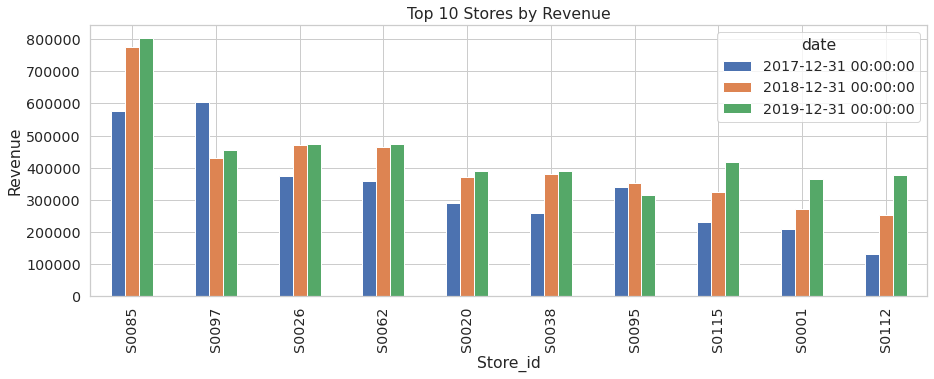

In [23]:
df2 = df_rev.iloc[:,0:3]
df2.plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Stores by Revenue")
plt.xlabel("Store_id")
plt.ylabel("Revenue")
plt.show()

**Observation:**


1.   Most of the stores have grown over the given period in terms of revenue
2. S0085, S0097 and S0026 are top performing store in terms of revenue.   



<a id=section505></a>
## 5.5 Top 10 performing stores by volume

In [24]:
df3= df_sales_new.pivot_table(index= pd.Grouper(key='date',freq='A'),columns= "store_id", values='sales',aggfunc='sum').fillna(0)
df3= df3.pivot_table(index='date',aggfunc='sum',margins= True, margins_name='Total')
df3

store_id                S0001     S0002    S0003    S0004    S0005    S0006  \
date                                                                          
2017-12-31 00:00:00  45905.87  37411.43 12932.52 14135.30     0.00  3673.00   
2018-12-31 00:00:00  48685.42  37387.37 13269.11 12896.32 11383.80  4091.00   
2019-12-31 00:00:00  43315.44  30391.99 10030.54 10567.00  8566.41  3301.00   
Total               137906.73 105190.79 36232.17 37598.62 19950.21 11065.00   

store_id              S0007    S0008    S0009    S0010    S0011    S0012  \
date                                                                       
2017-12-31 00:00:00    0.00 14768.99  5862.00 27075.43 11620.18 16583.00   
2018-12-31 00:00:00    0.00 20940.14  7342.10 27598.37  9509.72 17499.00   
2019-12-31 00:00:00 5238.00 21065.55  6220.00 19261.51  8165.70 12388.41   
Total               5238.00 56774.68 19424.10 73935.30 29295.60 46470.41   

store_id               S0013    S0014    S0015    S0016    S0017    S0018  \
date                                                                        
2017-12-31 00:00:00 19755.63 13137.53 26819.75 10174.68  8261.57 19001.33   
2018-12-31 00:00:00 21704.61 13032.07 29531.33 11262.17 10566.00 22901.79   
2019-12-31 00:00:00 16952.57 10467.78 21147.35  8691.18  8169.00 16448.60   
Total               58412.82 36637.38 77498.43 30128.03 26996.57 58351.71   

store_id               S0019     S0020    S0021    S0022    S0023    S0024  \
date                                                                         
2017-12-31 00:00:00  8530.00  71671.27 11026.07 20499.70 28225.54 36115.05   
2018-12-31 00:00:00  7889.00  73002.80  9888.99 20328.20 30017.65 36048.90   
2019-12-31 00:00:00  4819.00  52166.53  8617.03 13480.40 23225.49 25561.59   
Total               21238.00 196840.59 29532.09 54308.31 81468.67 97725.54   

store_id               S0025     S0026    S0027     S0028    S0029    S0030  \
date                                                                          
2017-12-31 00:00:00 14068.00  81737.44 13751.21  67291.58 11556.02  5153.00   
2018-12-31 00:00:00 13825.42  81269.99 12802.23  54968.27 12330.00  4267.00   
2019-12-31 00:00:00  9391.52  55621.28  9616.00  38585.43  9095.00  4552.00   
Total               37284.94 218628.70 36169.43 160845.28 32981.02 13972.00   

store_id                S0031    S0032    S0033    S0034    S0035    S0036  \
date                                                                         
2017-12-31 00:00:00  38890.93 10412.80 12057.00  4147.00 13436.12     0.00   
2018-12-31 00:00:00  39025.38 10799.00 10942.50  6751.00 14303.00 13106.33   
2019-12-31 00:00:00  28652.09  8452.43  7537.00  6319.00 10959.00 10624.87   
Total               106568.40 29664.23 30536.50 17217.00 38698.12 23731.20   

store_id               S0037     S0038    S0039     S0040    S0041    S0042  \
date                                                                          
2017-12-31 00:00:00     0.00  80016.33  6956.02  43512.72  5984.00 15716.17   
2018-12-31 00:00:00  8433.00  73529.09  8414.18  35780.15  4462.00 18297.90   
2019-12-31 00:00:00  9803.00  49663.55  6222.98  25475.16  3079.00 20914.67   
Total               18236.00 203208.97 21593.18 104768.03 13525.00 54928.74   

store_id               S0043    S0044    S0045    S0046   S0047     S0048  \
date                                                                        
2017-12-31 00:00:00 28489.03  6048.00  9667.25     0.00    0.00  50858.58   
2018-12-31 00:00:00 29931.61  6410.00 11364.40  9955.53    0.00  42148.39   
2019-12-31 00:00:00 20699.42  4375.00  9110.40  9632.69 4749.00  25711.42   
Total               79120.06 16833.00 30142.05 19588.22 4749.00 118718.40   

store_id               S0049    S0050     S0051    S0052    S0053    S0054  \
date                                                                         
2017-12-31 00:00:00 23754.12 15213.85  34932.93 15048.93 10180.21 11122.12   
2018-12-31 00:00:00 

In [25]:
# Top 10 stores by Volume Sales
df_vol = df3.transpose()
df_vol = df_vol.sort_values('Total', ascending=False)[:10]
df_vol

date      2017-12-31 00:00:00  2018-12-31 00:00:00  2019-12-31 00:00:00  \
store_id                                                                  
S0085               155695.95            160282.56            116630.01   
S0097               198992.76             69893.05             53711.84   
S0026                81737.44             81269.99             55621.28   
S0062                73196.58             78308.41             56496.07   
S0038                80016.33             73529.09             49663.55   
S0020                71671.27             73002.80             52166.53   
S0115                56945.96             59352.37             52249.89   
S0028                67291.58             54968.27             38585.43   
S0112                47609.62             60733.61             49657.28   
S0095                54085.87             50940.02             39693.17   

date         Total  
store_id            
S0085    432608.52  
S0097    322597.65  
S0026    218628.70  
S0062    208001.06  
S0038    203208.97  
S0020    196840.59  
S0115    168548.22  
S0028    160845.28  
S0112    158000.52  
S0095    144719.06

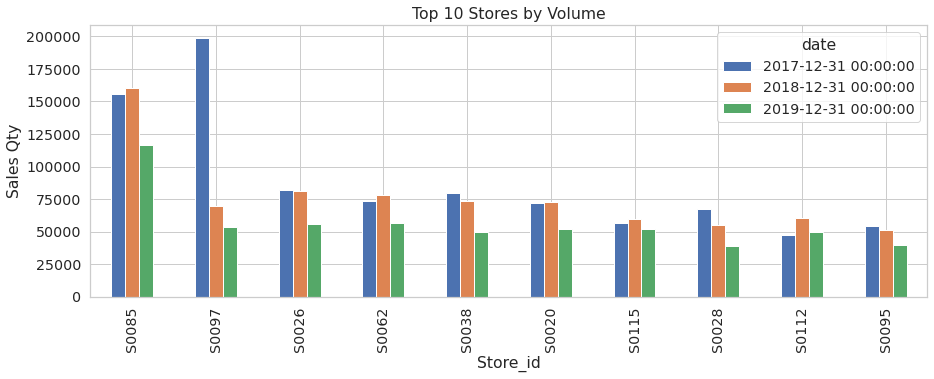

In [26]:
df4 = df_vol.iloc[:,0:3]
df4.plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Stores by Volume")
plt.xlabel("Store_id")
plt.ylabel("Sales Qty")
plt.show()

**Observations:**


1.  YoY overall drop in volume sales is seen across stores, though there is an overall increase in Revenue.
2.   It can be inferred that the AVERAGE SELLING PRICE has improved due to selling of more high value products and overall increase in product prices YoY. 
3. S0085, S0097 and S0026 are top performing store not only in terms of value sales but also in terms of volumes.


<a id=section506></a>
## 5.6 Product wise sales trends

In [27]:
df_week = df_sales_new
df_week = df_week.groupby([pd.Grouper(key='date',freq='M'),'product_id']).sum()
df_week_sales = df_week.drop(['price','promo_discount_2','stock'], axis=1)
df_week_sales

sales   revenue
date       product_id                    
2017-01-31 P0001          70.00    377.89
           P0004          16.00     60.97
           P0005          13.00    373.49
           P0011          43.00   1276.03
           P0014           0.00      0.00
           P0015         711.00   1487.34
           P0016          35.00     64.80
           P0017        4891.00   4988.70
           P0018         994.00   1616.04
           P0024          90.00    162.66
           P0035        1941.00   5191.34
           P0043           2.00     31.05
           P0046         116.00   3379.11
           P0050           6.00     30.24
           P0051       11406.00   7393.67
           P0054         283.00   1035.48
           P0055         456.00   1458.80
           P0057          97.00    971.31
           P0059          21.00    188.26
           P0060          98.00   1222.09
           P0061           3.00     20.34
           P0062         391.00   6593.29
           P0066           3.00      7.04
           P0067         124.00   1553.69
           P0068         118.00    491.15
           P0070         376.00   1865.24
           P0071          31.00    230.85
           P0072           2.00      6.62
           P0073          29.00    146.16
           P0079        2035.00   4238.38
           P0080           4.00     18.12
           P0083         172.00   1105.75
           P0089          13.00     66.04
           P0090         172.00    423.01
           P0092        1136.00   1662.76
           P0097          46.00    481.23
           P0099         316.00   2919.33
           P0102          25.00   2129.21
           P0103       17314.00  43074.22
           P0109         188.00   1439.75
           P0110         375.00   1022.81
           P0114        1466.00    612.55
           P0116        3572.00   2462.94
           P0125        1991.00   5381.54
           P0126           8.00    134.88
           P0129       11411.00 254107.22
           P0130           9.00     49.47
           P0131        2304.00   4795.05
           P0132         227.00   1412.86
           P0134         143.00    781.01
           P0137          21.00    425.26
           P0140        1040.00   5689.40
           P0144         100.00    448.39
           P0145          10.00     45.81
           P0147         154.00    520.55
           P0148         260.00   1369.11
           P0150           2.00     22.02
           P0151           6.00     35.10
           P0152          30.00    387.55
           P0154          41.00     71.75
           P0157         282.00   1815.21
           P0158           0.00      0.00
           P0160          10.00     23.13
           P0161           2.00     10.08
           P0162          69.00    239.82
           P0163          25.00    223.84
           P0164          25.00    514.84
           P0165         172.00    226.02
           P0166          19.00    167.17
           P0169         305.00   1039.69
           P0170           0.00      0.00
           P0171         372.00   3542.41
           P0172           1.00      2.97
           P0174          87.00    241.80
           P0175         214.00    974.91
           P0176          22.19    102.50
           P0177         101.00    520.91
           P0178           4.00     43.24
           P0180          35.00    544.45
           P0183          74.00    378.94
           P0184           2.00     82.54
           P0185        1696.00   1272.00
           P0187         147.00   1981.04
           P0189          59.00    300.38
           P0192           7.00    533.32
           P0195         261.00   1365.77
           P0196         338.00   2361.46
           P0197         570.00   1846.81
           P0198        3213.00   1469.02
           P0201         137.00   1740.31
           P0203          16.00    185.17
           P0204          30.00    141.51
           P0205          24.00    236.79
           P0206         309.00    4

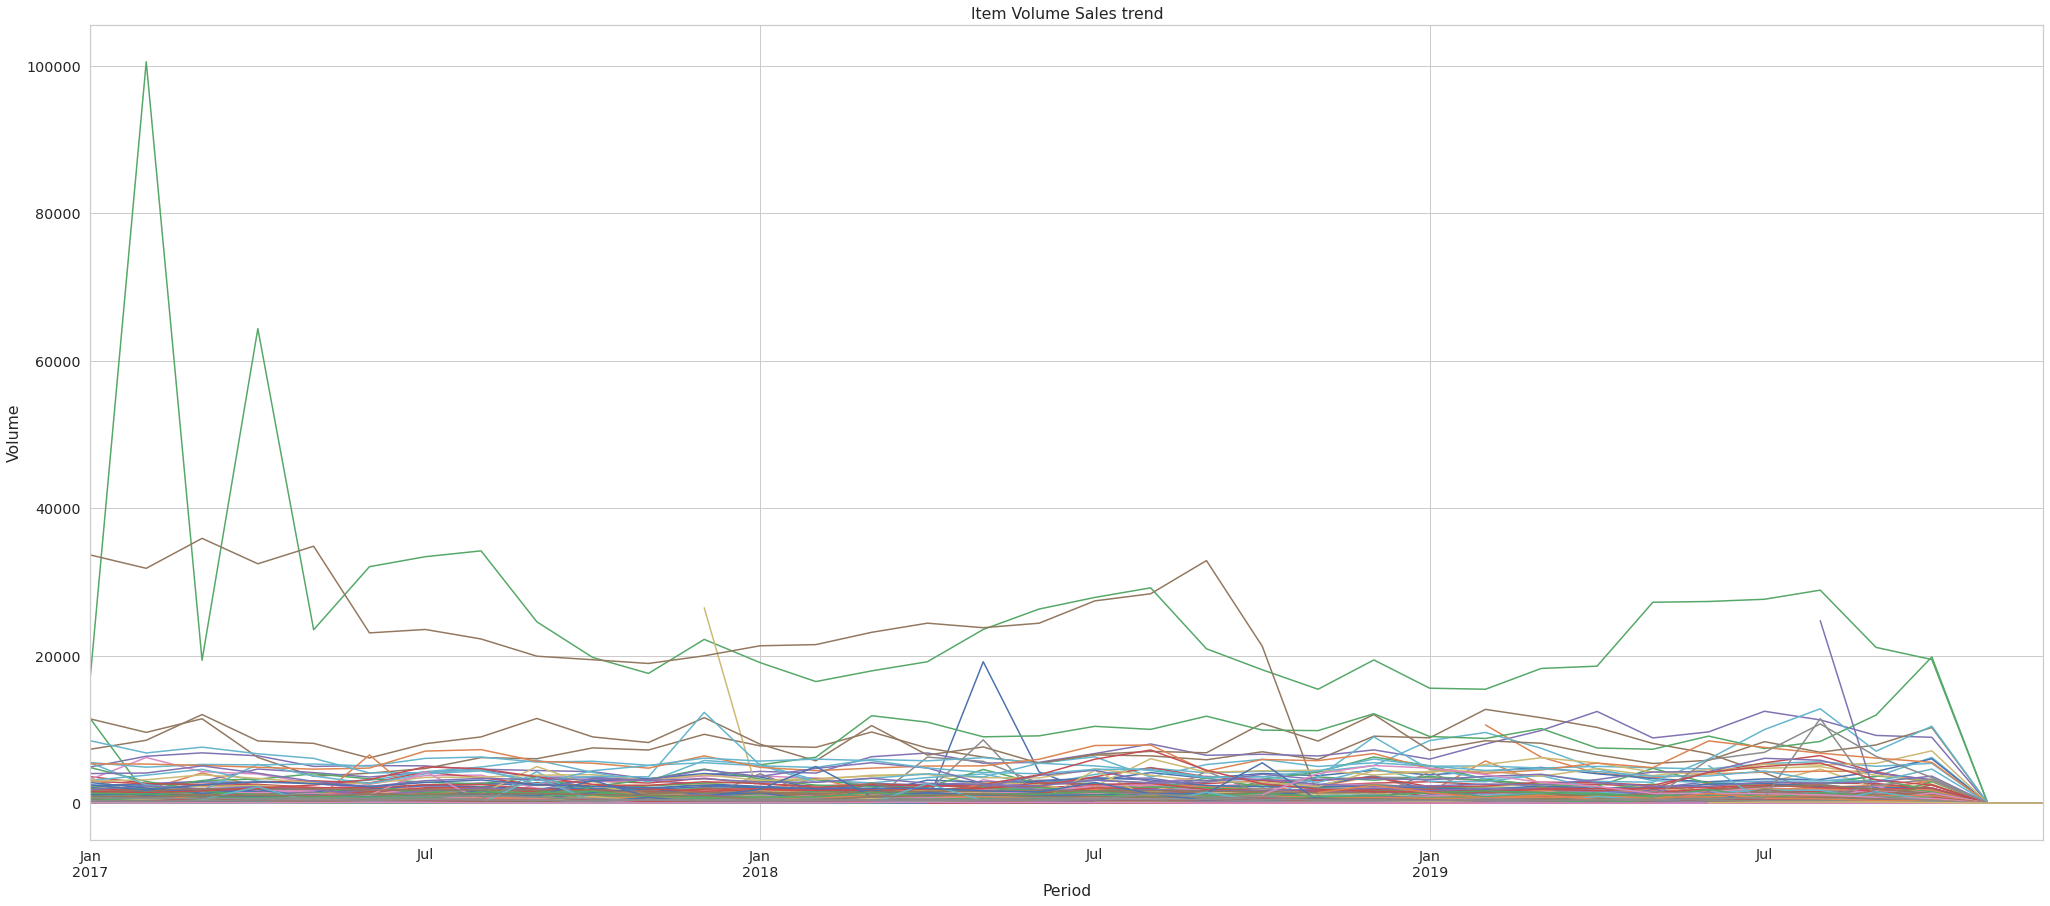

In [28]:
fig,ax = plt.subplots(figsize=(35,15))
df_week_sales.groupby(['date','product_id']).sum()['sales'].unstack().plot(ax=ax)
ax.set_xlabel('Period')
ax.set_ylabel('Volume')
ax.set_title('Item Volume Sales trend')
ax.get_legend().remove()

**Observation:**


1.   Lot of demand fluctuations can be seen as a trend for Fast Moving Products. This will always create challenges for the store in demand planning.
2.   We can also see certain products have high volumes during the launch period and have even out over a period of time. 
3. There are ceratin products in which there is spike in qty sales observed without any seasonal trend.



<a id=section507></a>
## 5.7 Product wise Revenue Performance

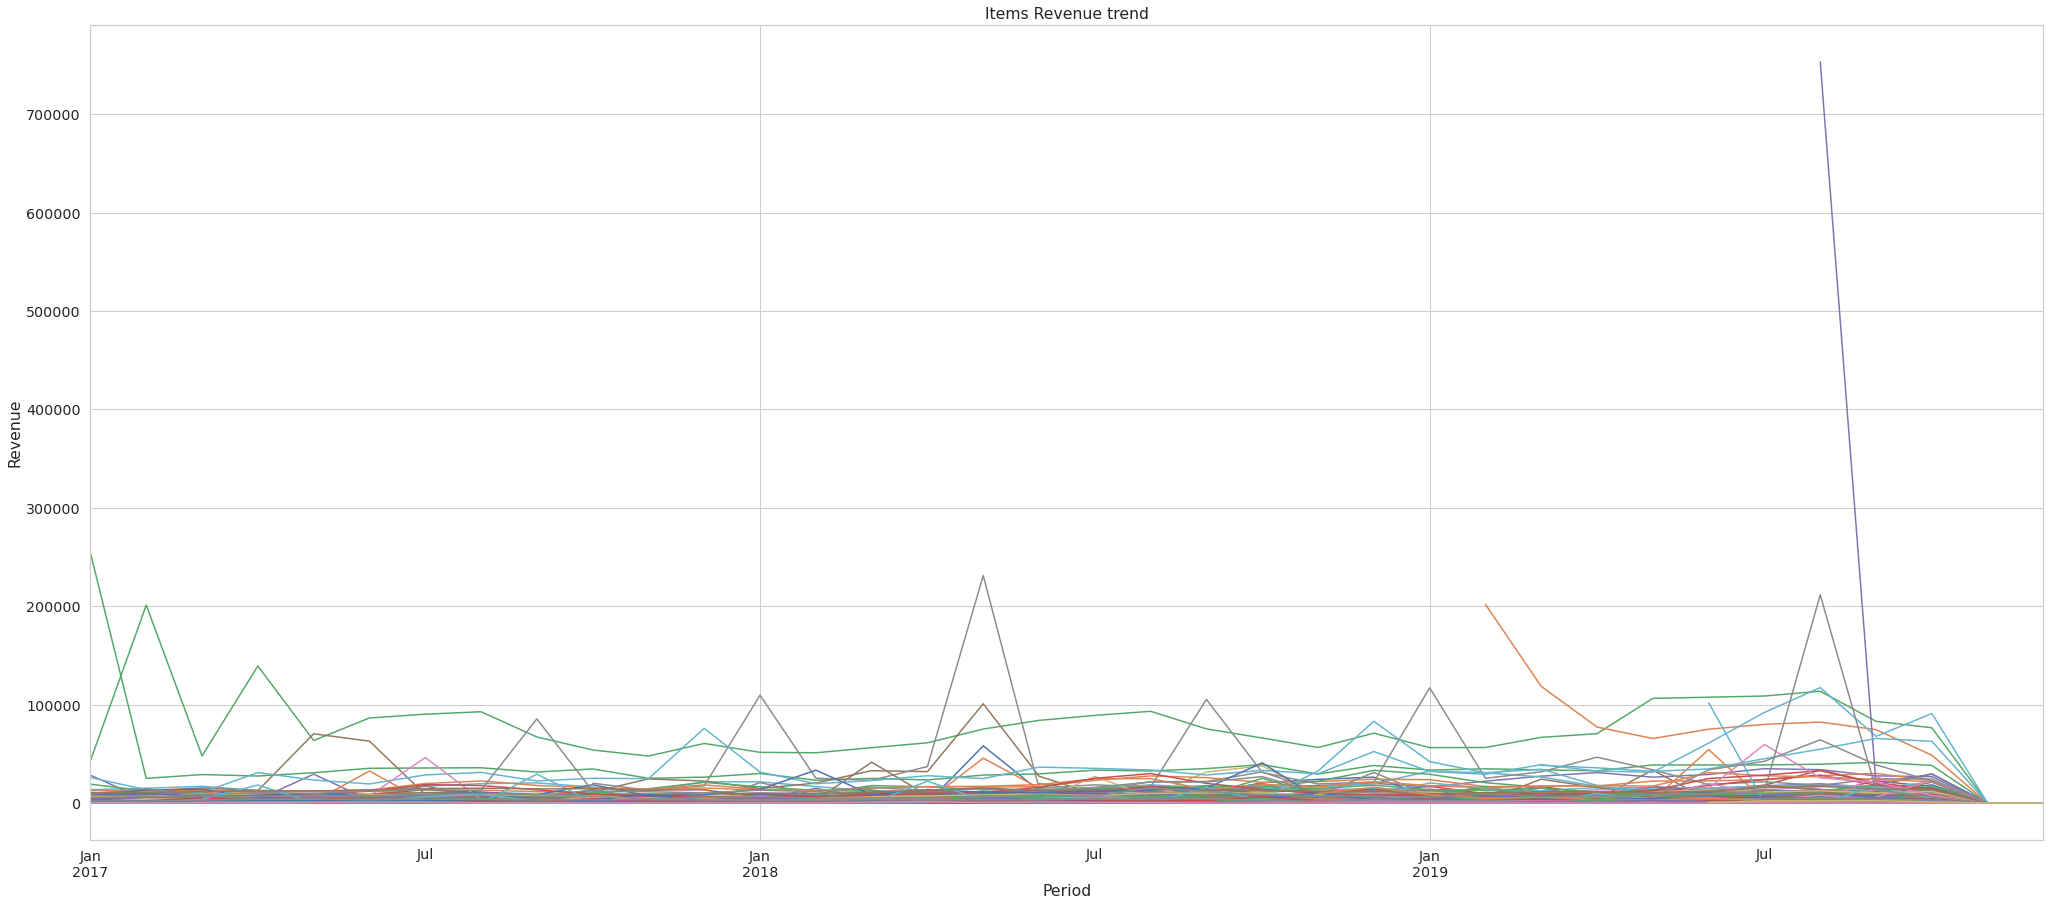

In [29]:
fig,ax = plt.subplots(figsize=(35,15))
df_week_sales.groupby(['date','product_id']).sum()['revenue'].unstack().plot(ax=ax)
ax.set_xlabel('Period')
ax.set_ylabel('Revenue')
ax.set_title('Items Revenue trend')
ax.get_legend().remove()

<a id=section508></a>
## 5.8 Pareto Analysis (80:20 rule)

*   The objective of the Paeto analysis is to access the business health and performance.
*   This essentially gives a picture of business dependency on certain variables like products, customers
*   Our anaysis is to found whether the given retail business's 80% revenue is dependent on the top 20% products.


In [30]:
df5 = df_sales_new.pivot_table(index= pd.Grouper(key='date',freq='A'),columns= "product_id", values='revenue',aggfunc='sum').fillna(0)
df5 = df5.pivot_table(index='date',aggfunc='sum',margins= True, margins_name='Total')
df5

product_id             P0001   P0002   P0004    P0005   P0006   P0007   P0008  \
date                                                                            
2017-12-31 00:00:00  2977.65 1342.88  625.07  6981.39    0.00    0.00    0.00   
2018-12-31 00:00:00 12160.60 5367.92  870.62  9165.74 2229.90 1726.05 4598.00   
2019-12-31 00:00:00  5990.19 3065.59  135.60  9261.49  320.27 2643.42 3660.95   
Total               21128.44 9776.39 1631.29 25408.62 2550.17 4369.47 8258.95   

product_id            P0009   P0010   P0011    P0012   P0014     P0015  \
date                                                                     
2017-12-31 00:00:00    0.00    0.00 3310.14     0.00 1493.41  29106.77   
2018-12-31 00:00:00    0.00 3300.47 2758.12     0.00 1921.31  40692.74   
2019-12-31 00:00:00 4949.76 1431.41 1746.19 30086.41 1286.96  36880.64   
Total               4949.76 4731.88 7814.45 30086.41 4701.68 106680.15   

product_id            P0016     P0017    P0018  P0019  P0020   P0021    P0022  \
date                                                                            
2017-12-31 00:00:00  625.72  65733.21  3376.03   0.00   0.00    0.00     0.00   
2018-12-31 00:00:00 1014.38  53954.83 13954.79   0.00   0.00 4398.08     0.00   
2019-12-31 00:00:00  533.08  46778.16 13717.93   0.00 462.50  620.37 12019.73   
Total               2173.18 166466.20 31048.75   0.00 462.50 5018.45 12019.73   

product_id            P0024    P0025    P0026  P0027    P0028   P0029   P0030  \
date                                                                            
2017-12-31 00:00:00 2828.04     0.00     0.00   0.00     0.00  574.77    0.00   
2018-12-31 00:00:00 3395.34     0.00     0.00 292.07  1322.82  609.12    0.00   
2019-12-31 00:00:00   60.33 10832.72 35013.26 222.18 21843.82 2201.99 7317.24   
Total               6283.71 10832.72 35013.26 514.25 23166.64 3385.88 7317.24   

product_id           P0031  P0032   P0033     P0035   P0036   P0037   P0038  \
date                                                                          
2017-12-31 00:00:00   0.00   0.00    0.00  66461.99    0.00    0.00    0.00   
2018-12-31 00:00:00   0.00   0.00    0.00  86406.32 4548.92  381.35    0.00   
2019-12-31 00:00:00 884.04   0.00 6855.69  76551.86   56.48 1144.05 3730.07   
Total               884.04   0.00 6855.69 229420.17 4605.40 1525.40 3730.07   

product_id              P0039    P0041    P0042    P0043    P0044   P0045  \
date                                                                        
2017-12-31 00:00:00      0.00     0.00 11903.74   206.81 29253.55    0.00   
2018-12-31 00:00:00    406.51 28767.02 14774.97  4606.99 19078.50   11.76   
2019-12-31 00:00:00 129782.67 42341.50 11195.70  6158.35 14139.44 2521.66   
Total               130189.18 71108.52 37874.41 10972.15 62471.49 2533.42   

product_id              P0046   P0047    P0048  P0049   P0050     P0051  \
date                                                                      
2017-12-31 00:00:00  47590.36    0.00     0.00   0.00  588.12  55378.71   
2018-12-31 00:00:00  58909.51    0.00     0.00   0.00  484.26  62131.70   
2019-12-31 00:00:00   5450.62 3732.99 12603.59 585.31  339.00  57617.13   
Total               111950.49 3732.99 12603.59 585.31 1411.38 175127.54   

product_id            P0053    P0054    P0055    P0057    P0058     P0059  \
date                                                                        
2017-12-31 00:00:00    0.00 10564.68 27849.58 10644.33     0.00  16972.85   
2018-12-31 00:00:00 1972.92 26719.32 28404.07  8127.09 76161.30  80752.70   
2019-12-31 00:00:00 3207.44 32212.23 29016.25  1879.39    35.20  62707.75   
Total               5180.36 69496.23 85269.90 20650.81 76196.50 160433.30   

product_id             P0060     P0061    P0062    P0063  P0064   P0065  \
date                                                                      
2017-12-31 00:00:00 17258.01   1103.40 63488.40     0.00   0.00    0.00   
2018-12-31 00:00:

In [31]:
# Top 20% products contributing 80% value sales 
df_top_products = df5.transpose()
df_top_products = df_top_products.sort_values('Total', ascending=False)[:135]
df_top_products

date        2017-12-31 00:00:00  2018-12-31 00:00:00  2019-12-31 00:00:00  \
product_id                                                                  
P0103                 993871.25            830461.10            845867.31   
P0129                 590746.01            367407.47            370046.24   
P0500                 331928.70            375652.25            593214.37   
P0428                  50742.64            653286.92            361824.23   
P0182                      0.00                 0.00            823723.09   
P0559                      0.00                 0.00            801695.38   
P0316                 265887.20            280797.25             69801.57   
P0569                 184374.36            214329.63            216329.05   
P0325                 138427.43            226418.29            224027.01   
P0261                 190717.01            190652.02            191185.97   
P0131                  90100.29            166928.10            275644.46   
P0747                  86181.11             93340.97            288695.17   
P0663                 116386.36            164189.44            169784.36   
P0689                 210625.03            187931.76             38970.67   
P0718                 156148.85            141384.55            125629.08   
P0333                 114028.35            137516.54            154086.18   
P0436                 108869.53            126759.68            151087.47   
P0680                      0.00                 0.00            369177.16   
P0388                      0.00            174426.00            148804.50   
P0364                  96602.28            108209.90            107351.38   
P0658                  94192.42            100576.28            111646.43   
P0351                 112559.39             96594.85             97164.60   
P0413                  88766.77            119807.90             88673.94   
P0681                 112194.38            181539.50              2438.38   
P0061                   1103.40            105264.84            158005.05   
P0372                  65060.13            106940.90             91085.98   
P0171                  68544.68             96146.79             98137.44   
P0455                      0.00            120050.91            135387.83   
P0639                  85974.61             81743.39             86640.15   
P0125                  74761.36             92498.13             83430.32   
P0390                  65594.54             90145.48             94551.74   
P0260                  74970.98             96155.49             75623.81   
P0435                  56830.43             95111.60             93941.97   
P0348                  65166.67             80498.85             99543.79   
P0140                  87582.80             85958.50             67031.00   
P0536                  67654.05             85550.94             82875.50   
P0219                  60534.82             64612.93            107784.62   
P0615                  64489.63            101613.73             66357.34   
P0130                  60369.82             76122.21             94380.81   
P0035                  66461.99             86406.32             76551.86   
P0608                  72182.73             89087.30             66254.14   
P0408                  53613.74             80146.17             90802.02   
P0438                 103471.03            113796.08                27.09   
P0336                  33931.27             89859.19             85003.41   
P0709                      0.00                 0.00            206407.60   
P0305                  29868.16            134252.37             21396.37   
P0051                  55378.71             62131.70             57617.13   
P0655                  57924.38             72118.88             44988.78   
P0405                   8591.90             98403.88             64195.72   
P0167                    629.20            158456.15             11279.45

In [32]:
# Revenue from Top 20% products
df_top_products.Total.sum()

30189236.770999692

In [33]:
# 80% contribution
df_contribution = df_top_products.Total.sum() / df_sales_new.revenue.sum()*100
print('20% of the product contribute:',df_contribution,'% revenue')

20% of the product contribute: 80.07704864703622 % revenue


**Observations:**


1.   We found that 80:20 rule applies to this retail business.
2.   Top 20% of the products are generating 80% revenue for the business.
3.   135 out of 649 products are generating 80% revenue.
4.   The business should focus in maximizing sales from this top 135-140 products.
5.   Product bundling strategies of the slow moving products should be around this fast moving products.
6.   Cross selling opportunities within the same category of the slow moving products and Fast moving products should be looked into.
7.   The Data set provided doesn't contain invoice level transaction information. This will be requied for proper BASKET ANALYSIS and subsequent bundling opportunities across related and unrealted categories of products. 


   



<a id=section509></a>
## 5.9 SPF analysis

In [34]:
master_df['store_size'] = master_df['store_size'].astype(float)
master_df['date'] = pd.to_datetime(master_df.date)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   product_id        object        
 1   store_id          object        
 2   date              datetime64[ns]
 3   sales             float64       
 4   revenue           float64       
 5   stock             float64       
 6   price             float64       
 7   promo_discount_2  float64       
 8   cluster_id        object        
 9   hierarchy1_id     object        
 10  storetype_id      object        
 11  store_size        float64       
 12  city_id           object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 2.0+ GB


In [35]:
master_df.describe()

sales     revenue       stock       price  promo_discount_2  \
count 19454838.00 19454838.00 19454838.00 19454838.00       19454838.00   
mean         0.41        1.94       14.91       15.16              1.63   
std         14.21       38.66       36.32       31.92              6.08   
min          0.00        0.00        0.00        0.00           -305.81   
25%          0.00        0.00        3.00        3.10              0.00   
50%          0.00        0.00        8.00        7.90              0.00   
75%          0.00        0.00       16.00       16.90              0.00   
max      43301.00    84197.96     4716.00     1599.00            100.00   

       store_size  
count 19454838.00  
mean        30.44  
std         15.12  
min          6.00  
25%         19.00  
50%         27.00  
75%         41.00  
max         86.00

In [36]:
df_spf = master_df
df_spf = df_spf.groupby(['store_id'])['revenue'].mean() / (df_spf['store_size'].mean())
df_spf = df_spf.sort_values(ascending=False)
df_spf

store_id
S0085   0.20
S0095   0.18
S0097   0.16
S0026   0.15
S0062   0.15
S0020   0.13
S0112   0.12
S0115   0.11
S0080   0.10
S0001   0.10
S0038   0.09
S0028   0.09
S0100   0.09
S0015   0.08
S0010   0.08
S0065   0.08
S0051   0.08
S0074   0.08
S0128   0.08
S0104   0.08
S0076   0.08
S0022   0.08
S0048   0.07
S0069   0.07
S0110   0.07
S0024   0.07
S0101   0.07
S0014   0.07
S0056   0.07
S0072   0.07
S0134   0.07
S0017   0.07
S0084   0.07
S0040   0.07
S0002   0.07
S0098   0.07
S0138   0.07
S0075   0.06
S0121   0.06
S0029   0.06
S0079   0.06
S0094   0.06
S0003   0.06
S0061   0.06
S0106   0.06
S0042   0.06
S0031   0.06
S0047   0.06
S0108   0.05
S0116   0.05
S0081   0.05
S0067   0.05
S0058   0.05
S0059   0.05
S0126   0.05
S0018   0.05
S0111   0.05
S0053   0.05
S0136   0.05
S0023   0.05
S0105   0.05
S0037   0.05
S0129   0.05
S0124   0.05
S0133   0.05
S0066   0.05
S0096   0.05
S0011   0.05
S0103   0.05
S0113   0.05
S0118   0.05
S0125   0.05
S0054   0.05
S0013   0.05
S0082   0.05
S0021   0.05
S00

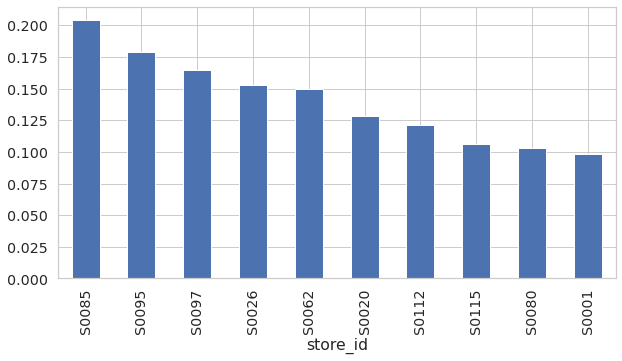

In [37]:
# Top 10 Stores in SPF
df_spf_top = df_spf.sort_values(ascending=False)[:10]
df_spf_top
df_spf_top.plot(kind='bar', figsize=(10,5))

**Observations:**


1.   It can be inffered from the store size data that it is not the actual store size as unit is unknown.
2.   From the outcome of SPF (sales per sq.ft) anaylsis we can clearly infer that either the store size are dummies or Store complete sales data during the period is not made available for the purpose of forecasting. That restricts the analysis to forecasting of only the 649 given products.
3. Top 8 stores in SPF anaysis are surprisingly among the top 10 stores in terms of revenue, but not in the same order.
4. S0085 is the top performing store across all three parameters - revenue, volume and SPF (indictor of operational efficiency)



<a id=section510></a>
## 5.10 Sell-thru analysis

In [38]:
# Product wise sell-thru analysis
df6 = master_df
df6 = df6.groupby('product_id')['stock','sales'].mean()
df6['sell-thru'] = (df6.sales / df6.stock)*100
df6 = df6.sort_values(by='sell-thru', ascending=False)
df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


stock  sales  sell-thru
product_id                         
P0243        0.00   1.30        inf
P0484        0.00   0.32        inf
P0203        0.00   1.70        inf
P0384        0.00   1.73        inf
P0550        0.00   0.92        inf
P0561        0.00   0.46        inf
P0316        0.00   1.84   48342.44
P0119        0.22   1.08     504.23
P0388        4.28   4.95     115.53
P0413        8.87   2.43      27.35
P0311        2.87   0.58      20.34
P0185        2.41   0.46      18.94
P0633        1.46   0.24      16.51
P0610       20.09   2.81      13.99
P0438       48.53   6.54      13.47
P0176        6.78   0.65       9.58
P0333       13.86   1.29       9.31
P0103       75.06   6.49       8.65
P0745        4.73   0.39       8.23
P0563        9.55   0.76       7.94
P0431       10.30   0.76       7.39
P0294       33.42   2.43       7.28
P0531       35.17   2.56       7.28
P0202      154.76  11.05       7.14
P0348       10.59   0.75       7.05
P0682       10.63   0.70       6.58
P0709       22.83   1.50       6.56
P0559       63.49   4.06       6.40
P0625        7.97   0.50       6.21
P0364       31.96   1.98       6.18
P0578        5.33   0.33       6.16
P0130       11.24   0.66       5.90
P0217       11.85   0.69       5.86
P0059        6.39   0.37       5.82
P0140        5.46   0.31       5.75
P0630       25.69   1.47       5.70
P0566       18.14   1.03       5.68
P0439       15.46   0.88       5.67
P0411        8.45   0.48       5.65
P0219        5.86   0.33       5.55
P0129        8.11   0.44       5.42
P0708        1.03   0.06       5.40
P0298       17.35   0.88       5.10
P0728       36.74   1.80       4.90
P0569       28.71   1.40       4.89
P0579       28.40   1.37       4.84
P0087       17.69   0.84       4.77
P0305       10.49   0.50       4.72
P0182       22.18   1.05       4.72
P0500       25.87   1.21       4.67
P0035       10.23   0.48       4.67
P0567        3.07   0.14       4.54
P0747        7.57   0.34       4.48
P0189        6.91   0.31       4.45
P0726       13.97   0.62       4.44
P0534       15.14   0.66       4.38
P0017       25.95   1.12       4.30
P0499       22.56   0.97       4.29
P0681       10.48   0.45       4.25
P0296       20.33   0.86       4.24
P0483        2.56   0.11       4.22
P0725        4.27   0.18       4.18
P0646        7.05   0.29       4.15
P0112        5.01   0.21       4.15
P0061        6.42   0.27       4.13
P0051       49.25   1.94       3.94
P0016       17.73   0.69       3.87
P0691        2.25   0.09       3.85
P0428       10.99   0.42       3.85
P0664       20.08   0.77       3.82
P0581       17.60   0.67       3.80
P0639        6.96   0.26       3.79
P0197       14.03   0.53       3.77
P0590       33.82   1.25       3.70
P0512        4.07   0.15       3.70
P0436       22.31   0.82       3.67
P0085        6.04   0.22       3.57
P0548       28.45   1.00       3.51
P0261       30.26   1.05       3.48
P0735        5.15   0.18       3.45
P0736       14.64   0.50       3.42
P0549        8.80   0.30       3.36
P0536       14.62   0.49       3.34
P0584       11.13   0.37       3.31
P0058       75.75   2.50       3.30
P0565       12.78   0.41       3.23
P0138        9.16   0.29       3.19
P0514        2.60   0.08       3.19
P0318       24.22   0.77       3.18
P0642       12.15   0.38       3.15
P0608        9.34   0.29       3.13
P0070        5.47   0.17       3.12
P0036       17.99   0.56       3.12
P0015       10.78   0.33       3.06
P0313        0.18   0.01       3.03
P0269        6.91   0.21       3.02
P0711       13.60   0.40       2.95
P0198       61.62   1.81       2.93
P0611        2.60   0.08       2.89
P0092       18.93   0.55       2.88
P0394       13.45   0.39       2.87
P0629        6.53   0.19       2.86
P0704       14.97   0.43       2.86
P0461       11.14   0.32       2.86
P0671        6.27   0.18       2.85
P0155        1.71   0.05       2.85
P0299        9.41   0.27       2.84
P0277       12.30   0.35       2.84
P0572       21.50   0.59       2.76
P0570        1.6

In [39]:
df7 = master_df
df7 = df7.sales.sum() / df7.stock.sum()*100
print('Sell-thru of the stores is:',df7,'%')

Sell-thru of the stores is: 2.746611722348479 %


**Observations:**


1.   The average sell-thru of the stores is very poor and at 2.75% only
2.   We can safely conclude that at a given point in time the stores are over-stocked with products. 
3. We found 6 products which were OOS (out of stock) and 3 products with less stocks, but with higher sales registered. It could be because of booking of sales at a wrong product_id.
4. The lowest sell-thru registered is 0.05% for product_id P0526 which is heavily stocked with meager sales.
5. Highest sell-thu of the product is 27.35% for product_id P0413.
6. The sell-thru analysis is giving a clear picture of the poor planning and managment of the store.
7. Looking at the SPF and Sell-thru we can conclude that the business is loss making.
8. There is a serious scope for revival of the stores through proper stock planning, demand forecasting, resizing of the stores to smaller formats to improve SPF and thus GMROF. Alternatively its open an opportunity to add new category of products.
9. We don't have the footfall and conversion data which is required for proper planning of promotions, bundling of products and other marketing initiatives.
10. More data points like footfall, selling area, invoice, product price, margins, opex, organization structure etc required to arrive at performance matrices like conversions, basket size, Ticket size,realization, profit, etc to take strategic decisions like store restructuring in terms of format, structure, closure, products, promotions.




<a id=section511></a>
## 5.11 Product bundling analysis

In [40]:
df8 = master_df
df8 = df8.groupby(['cluster_id','hierarchy1_id','product_id'])['revenue','sales'].sum()
df8['ASP'] = df8.revenue / df8.sales
df8 = df8.sort_values(by=['cluster_id','hierarchy1_id','ASP'], ascending=False)
df8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


revenue     sales     ASP
cluster_id hierarchy1_id product_id                             
cluster_9  H03           P0593        21617.77    480.00   45.04
                         P0188        11926.28    274.00   43.53
                         P0005        25408.62    714.00   35.59
                         P0491        22823.86    811.00   28.14
                         P0622         7225.71    272.00   26.57
                         P0463        11499.80    909.00   12.65
                         P0483       117671.00   9749.00   12.07
                         P0716         6187.88    979.00    6.32
                         P0481        32777.13   5471.00    5.99
                         P0063        13075.33   3455.00    3.78
                         P0372       263087.01  74759.00    3.52
                         P0532         2469.48    977.00    2.53
                         P0525        13376.67   6375.00    2.10
                         P0311        59766.00  59766.00    1.00
           H02           P0630         5636.44    312.11   18.06
                         P0610        94627.25  11699.92    8.09
                         P0176         4139.80    971.52    4.26
                         P0298         1333.60    376.90    3.54
           H01           P0687        17616.57    373.00   47.23
                         P0480        14904.88    372.00   40.07
                         P0039       130189.18   4485.00   29.03
                         P0606         5923.57    259.00   22.87
                         P0670        14993.90    735.00   20.40
                         P0061       264373.29  15280.00   17.30
                         P0221        10804.41    684.00   15.80
                         P0537         6787.08    490.00   13.85
                         P0701        12582.01   1051.00   11.97
                         P0512        63674.70   5523.00   11.53
                         P0050         1411.38    207.00    6.82
                         P0147        89226.60  13991.00    6.38
                         P0540          525.53     84.00    6.26
           H00           P0259        12205.74    871.00   14.01
                         P0241        81658.59   6413.00   12.73
                         P0219       232932.37  22946.00   10.15
                         P0707        18830.68   2132.00    8.83
                         P0713         1101.80    140.00    7.87
                         P0695        32246.48   5251.00    6.14
                         P0709       206407.60  34019.00    6.07
                         P0054        69496.23  11685.00    5.95
                         P0088        29630.25   5162.00    5.74
                         P0431        86399.61  15240.00    5.67
                         P0441        10321.22   1908.00    5.41
                         P0694        99277.09  18763.00    5.29
                         P0036         4605.40    982.00    4.69
                         P0371         7033.88   1611.00    4.37
                         P0598         8430.20   1932.00    4.36
                         P0448        19716.39   5265.00    3.74
                         P0536       236080.49  67761.00    3.48
                         P0569       615033.04 192400.00    3.20
                         P0574        76555.68  34171.00    2.24
                         P0531        82905.62  66781.00    1.24
cluster_8  H03           P0451        12064.56    601.00   20.07
                         P0252        60033.57   3180.00   18.88
                         P0186        17355.18   4497.00    3.86
                         P0206        37126.08  24928.00    1.49
           H01           P0201        73711.56   5603.00   13.16
                         P0414        33880.55   2757.00   12.29
                         P0735       105877.34  11243.00    9.42
                         P0587        69282.14  17502.00    3.96
           H00           P0068        18721.02   3594.00    5.21
         

**Observations and Recommendations:**

1.   Cluster_0 has maximum number of products even with the first level hierarchy. 
2. Cluster_1 has the lowest number of products - only 4 nos.
3.   We must look at bundling products within the same cluster id and hierarchy1 id level for cross selling opportunities. The product under one hierarchy will exhibit similar or related properties.
4. Within the cluster level we should look at add-on selling opportunities. Though they are unrelated products but fall under the umbrella category of the products.
5. With the limited transactional data available (read invoice and Ticket size data), proper consumer BASKET ANALYSIS can't be done, which would have given clear picture of bundling opportunities.



<a id=section512></a>
## 5.12 Correlation Matrix 

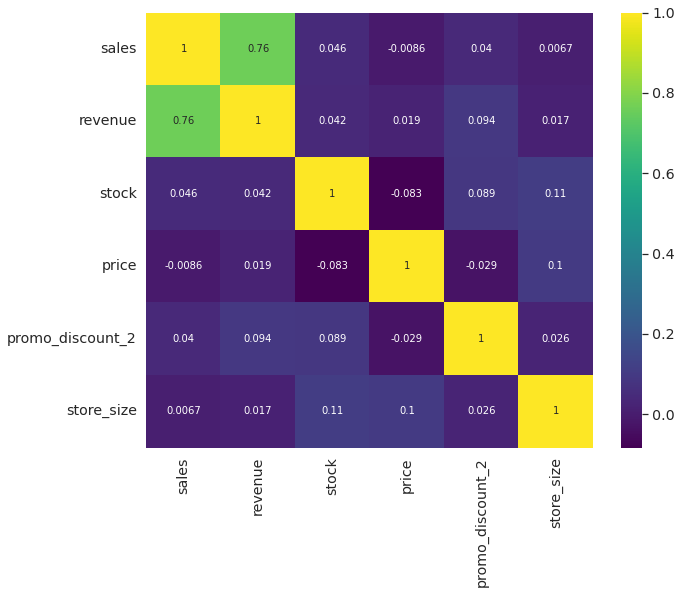

In [42]:
corr_matrix = master_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

**Observations**
- Only Sales and Revenue have high positive correlation of 0.76
- Since Sales will be the target variable, we will not face multi-collinearity issue in our model

<a id=section6></a>
# 6. Actionable Insights

1. Bundle products within the same cluster id and hierarchy1 id level for cross selling opportunities.
2. Within the same cluster level, we should look at add-on selling opportunities. A fast moving product within a cluster need to be bundled with a slow moving product to improve Basket size and Ticket size.
3. The client need to provide invoice level daily sales data for proper consumer BASKET ANALYSIS. It will give clear picture of products and the store that move together.
4. Invoice level daily sales data will help to design store specific promotions, bundling opportunities.
5. The sell-thru of the products is very very low at 2.75% cummulative. We can infer safely that complete data set of all the products is not provided to us for evaluation and only products with poor sell-thru is being provided. If this is not true, then we can say that the retail business is not performing at the current satge and need serious revival. Otherwise it will be prudent to close the stores and wind up the business.
6. From the sell-thru analysis we found most items overstocked and are slow moving vis a vis the stock levels. This gives an opportunity to reduce the stocking plan of the 699 products and free up shelves and warehouse to introduce newer products or to allocate space to categories which are growing and doing better.
7. The current stocks need to be liquidated with better discounting. This will free up space and capital.
8. From the SPF (Sell per Sq.Ft) analysis, though not conclusive as unit of store size is missing, we can still infer that the business is loss making given it sell only the given products (condition). 
9. More data points like footfall, selling area, invoice, product price, margins, opex, organization structure etc required to arrive at performance matrices like conversions, basket size, Ticket size,realization, profit, GMROI etc to take strategic decisions like store restructuring in terms of format, size, products, promotions, stocking plan, cost, maning, etc.
10. We did the Pareto analysis and found that 20% of the products are contributing 80% of the revenue. These 135 products are focussed products to deal with so that they keep on growing. On the same time, we need to  improve the spread of the products that contribute 80% revenue. This is must to spread risk.
11. YoY overall drop in volume sales is seen across stores, though there is an overall increase in Revenue.It can be inferred that the AVERAGE SELLING PRICE has improved due to selling of more high value products and overall increase in product prices YoY.
12. Apply our proposed machine learning model to improve product wise sales forecating and use the outcome to rationalize the stock level at each store. 